         RND      ADMIN        MKT       STATE     PROFIT
0  165349.20  136897.80  471784.10    New York  192261.83
1  162597.70  151377.59  443898.53  California  191792.06
2  153441.51  101145.55  407934.54     Florida  191050.39
3  144372.41  118671.85  383199.62    New York  182901.99
4  142107.34   91391.77  366168.42     Florida  166187.94
Mean Squared Error: 620978610.5745463
R-squared: 0.23316289360569642


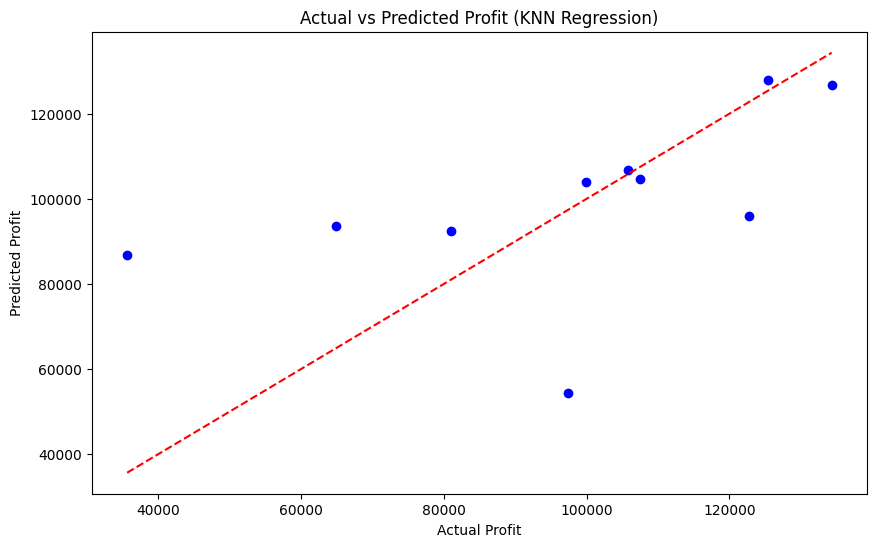

Fitting 5 folds for each of 56 candidates, totalling 280 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Optimized Mean Squared Error: 453089292.0158741
Optimized R-squared: 0.4404868771466536


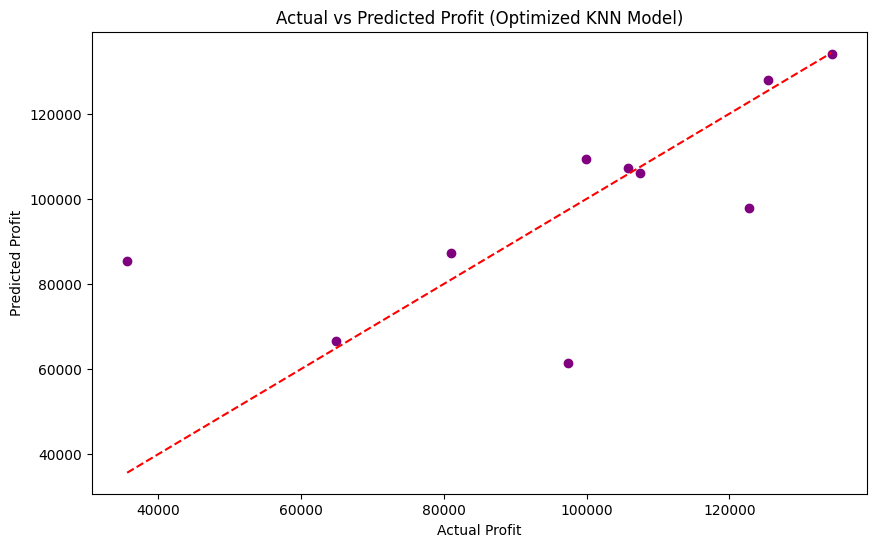

Feature Scaling Applied: [7.76878455e+04 1.21142923e+05 2.35747081e+05 1.00000000e+00], [4.72949943e+04 2.71087616e+04 1.13419044e+05 8.06225775e-01]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Load the dataset
df = pd.read_csv('50_Startups.csv')

# Display the first few rows of the dataset
print(df.head())

# Encode categorical data (State column)
labelencoder = LabelEncoder()
df['STATE'] = labelencoder.fit_transform(df['STATE'])

# Define features (X) and target (y)
X = df.drop('PROFIT', axis=1).values  # Features: R&D Spend, Administration, Marketing Spend, State
y = df['PROFIT'].values  # Target: Profit

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the KNN Regressor model
knn_regressor = KNeighborsRegressor()

# Fit the model on the training data
knn_regressor.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting actual vs predicted values for the test set
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Profit (KNN Regression)')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.show()

# Hyperparameter Tuning with Grid Search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 20],  # Number of neighbors
    'weights': ['uniform', 'distance'],      # Weight function
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],  # Distance metric
}

# GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=knn_regressor, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters found by GridSearch
print(f"Best Parameters: {grid_search.best_params_}")

# Use the best estimator from GridSearchCV
best_knn_regressor = grid_search.best_estimator_

# Predict using the best model
y_pred_best = best_knn_regressor.predict(X_test)

# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Optimized Mean Squared Error: {mse_best}')
print(f'Optimized R-squared: {r2_best}')

# Visualize the predictions of the optimized model (optional)
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_best, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Profit (Optimized KNN Model)')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.show()

# Feature importance (Not directly available for KNN, but we can inspect feature scaling)
print(f"Feature Scaling Applied: {scaler.mean_}, {scaler.scale_}")
